In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Just tp show basic structure of .xvg file
!head -50 temperature.xvg

# This file was created Sun Nov 19 23:06:06 2023
# Created by:
#                :-) GROMACS - gmx energy, 2023.3-conda_forge (-:
# 
# Executable:   /home/enrico/miniforge3/envs/moldyn/bin.AVX2_256/gmx
# Data prefix:  /home/enrico/miniforge3/envs/moldyn
# Working dir:  /home/enrico/Development/moldyn/lysozyme
# Command line:
#   gmx energy -f nvt.edr -o temperature.xvg
# gmx energy is part of G R O M A C S:
#
# GRowing Old MAkes el Chrono Sweat
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(K)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Temperature"
    0.000000  301.141266
    1.000000  295.728271
    2.000000  301.996155
    3.000000  300.535950
    4.000000  297.726654
    5.000000  298.321381
    6.000000  300.314240
    7.000000  301.352509
    8.000000  302.976624
    9.000000  299.828369
   10.000000  299.616699
   11.000000  300.012634
   12.000000  

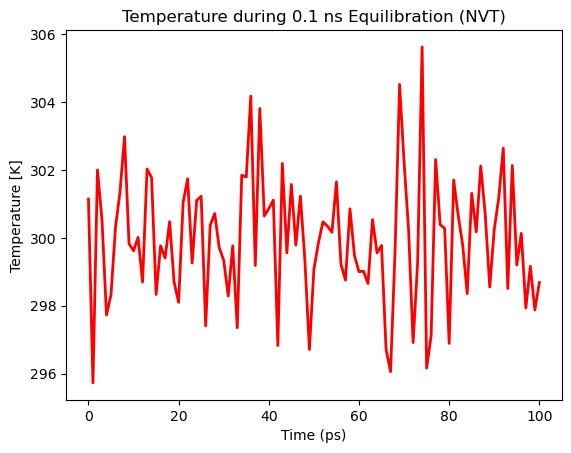

In [24]:
#Plotting the temperature of the system

#Reading the text file containing this information
data = np.loadtxt('temperature.xvg', comments=['@','#'])

plt.title('Temperature during 0.1 ns Equilibration (NVT)')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature [K]')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2', color='red')
plt.show()

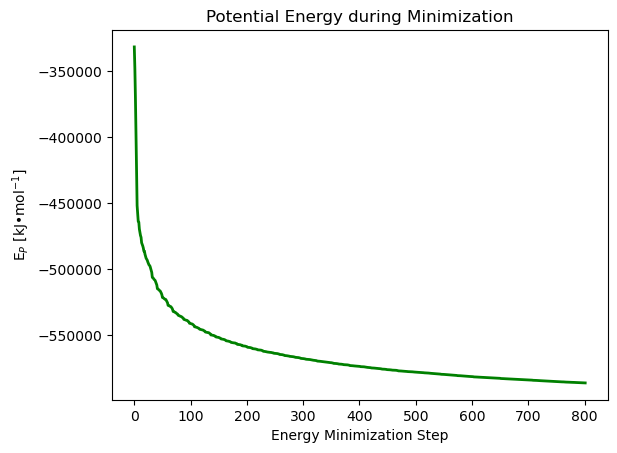

In [28]:
#Plotting the potential energy of the system

data = np.loadtxt('potential.xvg', comments=['@','#'])

plt.title('Potential Energy during Minimization')
plt.xlabel('Energy Minimization Step')
plt.ylabel(r'E$_P$ [kJ•mol$^{-1}]$')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2', color='green')
plt.show()

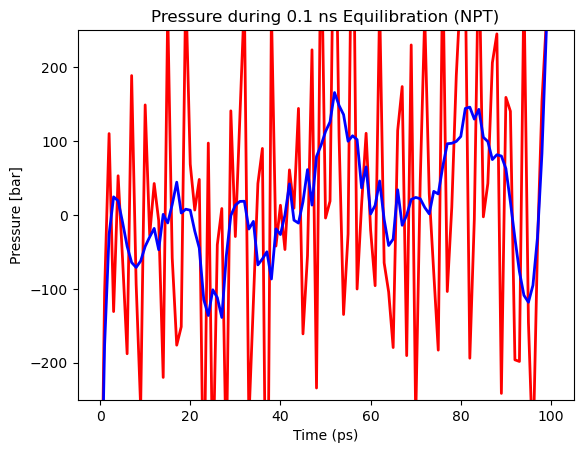

In [27]:
#Plotting the pressure/density of the system
data = np.loadtxt('pressure.xvg', comments=['@','#'])

plt.title('Pressure during 0.1 ns Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure [bar]')
plt.ylim(-250,250)

#Smoothing using Savitzky-Golay
from scipy.signal import savgol_filter
yhat = savgol_filter(data[:,1], 21, 5)

#Plot raw data and spline interpolation
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2', color='red')
plt.plot(data[:,0], yhat, linestyle='solid', linewidth='2', color='blue')
plt.show()